# EDA
It is an approach to analyzing datasets to summarize their main characteristics
It is used to understand the data, get some context regarding it, understand the
variables and the relationships between them, and formulate hypotheses that could
be useful when building predictive models

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "serif"

In [2]:
housing = pd.read_csv("../data/raw/house-prices-advanced-regression-techniques/train.csv")

In [3]:
housing.shape

(1460, 81)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Key Objectives when performing data analysis
- All data analysis must be guided by some key question or objectives that guide everything that we do
- Before starting any data analysis tasks, we must have a clear goal in mind.
As an example, the following objectives will guide our exploration of this dataset:

- Understand the individual variables in the dataset
- Understand how the variables in this dataset relate to the sale price of the house

# Analyzing variables individually

In [5]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
numerical_vars =['SalePrice', 'LotArea', 'OverallQual', 'OverallCond',
                 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr']

categorical_vars = ['MSZoning', 'LotShape','Neighborhood', 'CentralAir', 
                    'SaleCondition','MoSold', 'YrSold']

In [7]:
housing = housing[numerical_vars+categorical_vars]

In [8]:
housing.shape

(1460, 15)

In [9]:
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

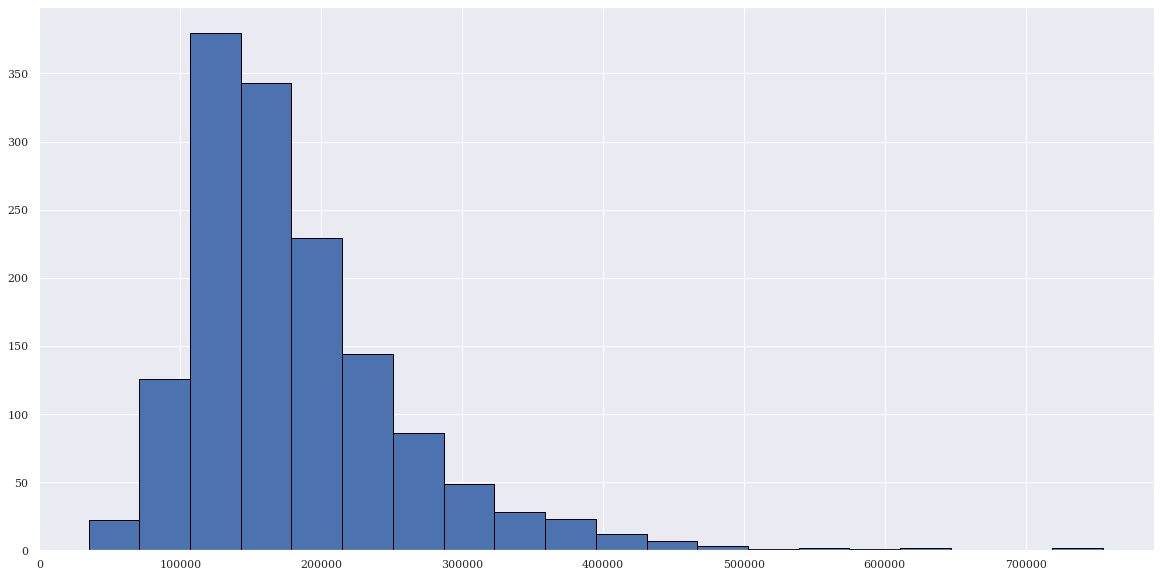

In [10]:
housing['SalePrice'].hist(edgecolor='black', bins=20);

In [11]:
# skewness and kurtosis
print("skewness: {:0.3f}".format(housing['SalePrice'].skew()))
print("kurtosis: {:0.3f}".format(housing['SalePrice'].kurt()))

skewness: 1.883
kurtosis: 6.536


# Observation:
Here, we see that very few houses are priced below 100,000 dollars, so most of the houses are concentrated between
100,000 and 200,000 dollars. Also, very few observations have very high prices. We have few houses above 400,000 dollars.

- Skewness:a skewness of 0 will tell us that we have a symmetric distribution; skewness > 0, will tell us that we have a positive tail as in the histogram 

- Kurtosis: it tells the thickness of our distribution, as we can see we have very high values concentrated around 100,00 and 200,000 dollars => 6.5 of kurtosis.

# Numerical variables

In [12]:
housing[numerical_vars].describe()

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,BedroomAbvGr
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,6.099315,5.575342,1971.267808,1162.626712,346.992466,2.866438
std,79442.502883,9981.264932,1.382997,1.112799,30.202904,386.587738,436.528436,0.815778
min,34900.000000,1300.000000,1.000000,1.000000,1872.000000,334.000000,0.000000,0.000000
25%,129975.000000,7553.500000,5.000000,5.000000,1954.000000,882.000000,0.000000,2.000000
50%,163000.000000,9478.500000,6.000000,5.000000,1973.000000,1087.000000,0.000000,3.000000
75%,214000.000000,11601.500000,7.000000,6.000000,2000.000000,1391.250000,728.000000,3.000000
max,755000.000000,215245.000000,10.000000,9.000000,2010.000000,4692.000000,2065.000000,8.000000


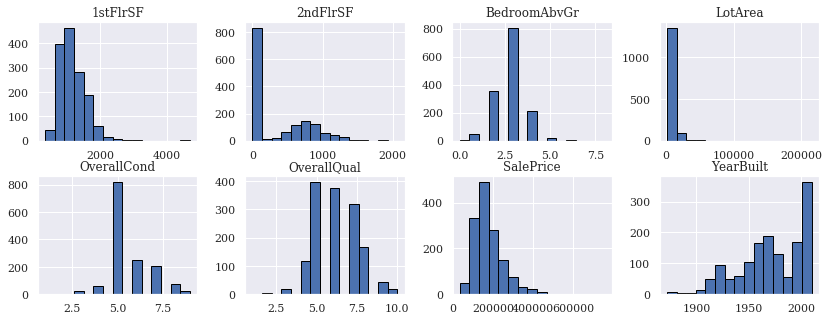

In [13]:
housing[numerical_vars].hist(edgecolor='black', bins=15, figsize=(14, 5), layout=(2,4));

- The distribution of sizes in the first floor is skewed to the right. => we have very few big houses, but most of the houses have theses values aroubd 1,000 or 1,200 square feet.
- We can observe a big 0 in the 2ndFlrsf variable. Those are the variables that don't have second flor.
- Most houses have three bedrooms
- The lot area is highly skewed; there are few houses with a large amoubt of area.
- The ratings for conditions and quality tend to around 5; few houses have very high or low ratings.
- The yearBuilt variable is actually not useful in its present form. However,we can use it to construct a varaible that actually makes sens; the age of the house at the time of the sale.

In [14]:
housing['Age'] = housing['YrSold'] - housing['YearBuilt']
numerical_vars.remove('YearBuilt')
numerical_vars.append('Age')

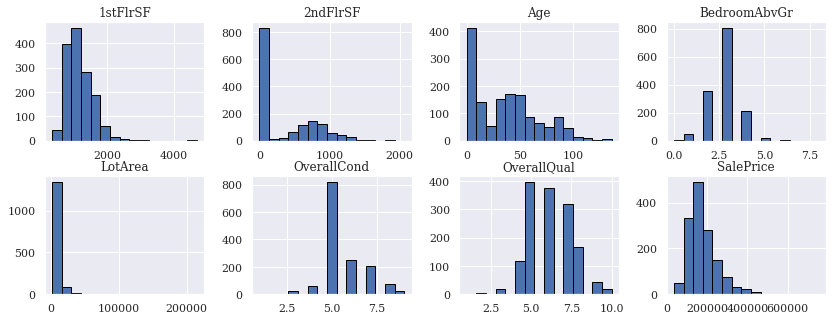

In [15]:
housing[numerical_vars].hist(edgecolor='black', bins=15, figsize=(14, 5), layout=(2,4));

- The Age variable with a big bar here at 0, => this means that many houses were sold; almost 400 houses were somd when they were new.

# Categorical variables

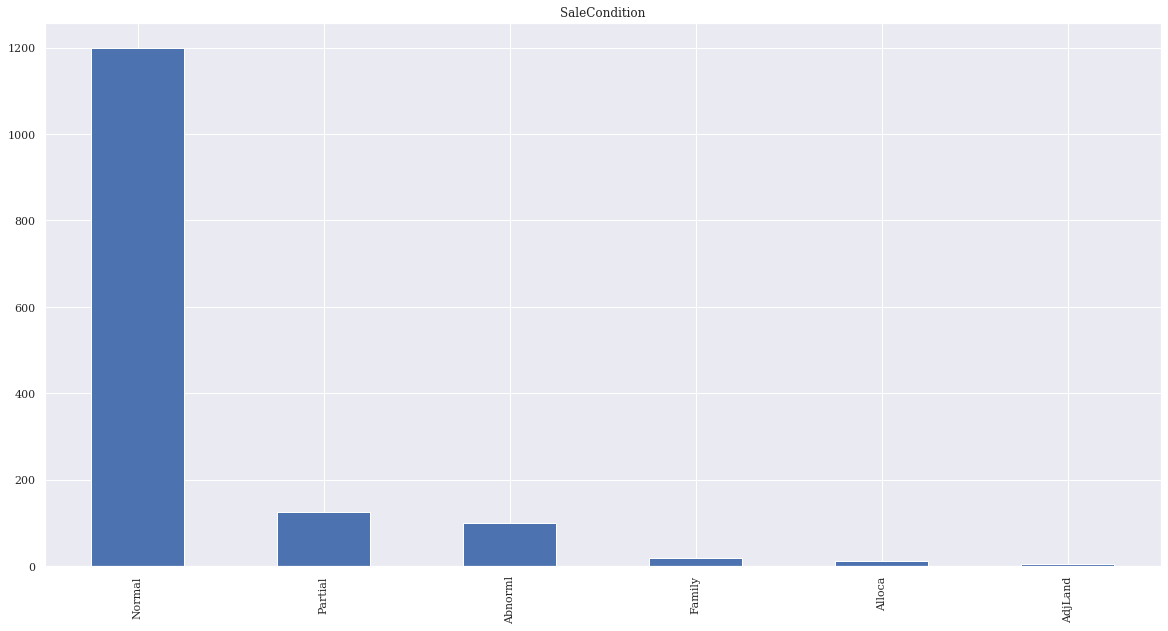

In [16]:
housing['SaleCondition'].value_counts().plot(kind='bar', title='SaleCondition');

- Most of the houses were sold under the Normal condition, almost 1,200 of them, and very few houses were somd with the other conditions mentioned.

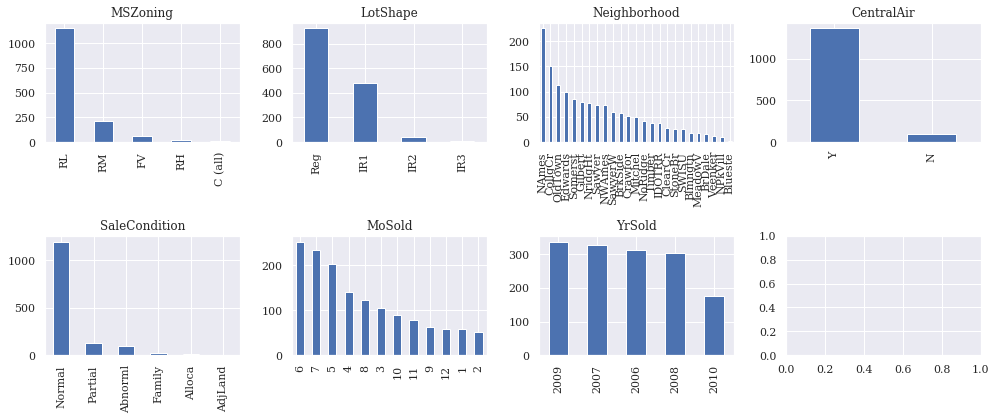

In [17]:
fig, ax = plt.subplots(2,4, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    housing[var].value_counts().plot(kind='bar', ax=subplot, title=var)

fig.tight_layout()

In [18]:
# Relationship between the variables and SalePrice: 
# identify level of catory that more than 30 values.
def identify_cat_above30(series):
    counts = series.value_counts()
    return list(counts[counts>=30].index)

In [19]:
# apply the function to every row of the data by using the apply() function
leveles_to_keep = housing[categorical_vars].apply(identify_cat_above30, axis=0) 
leveles_to_keep

MSZoning                                              [RL, RM, FV]
LotShape                                           [Reg, IR1, IR2]
Neighborhood     [NAmes, CollgCr, OldTown, Edwards, Somerst, Gi...
CentralAir                                                  [Y, N]
SaleCondition                           [Normal, Partial, Abnorml]
MoSold                     [6, 7, 5, 4, 8, 3, 10, 11, 9, 12, 1, 2]
YrSold                              [2009, 2007, 2006, 2008, 2010]
dtype: object

In [20]:
# make a for loop that will detect and keep the observations where the levels have more than 30 observations 
for var in categorical_vars:
    housing = housing.loc[housing[var].isin(leveles_to_keep[var])]

In [21]:
housing.shape

(1246, 16)

# Relationships between variables
- The scatter plot is used for visualizing relationships between two numerical variables.
- The box plot is used for visualizing relationships between one numerical variable and one categorical variable

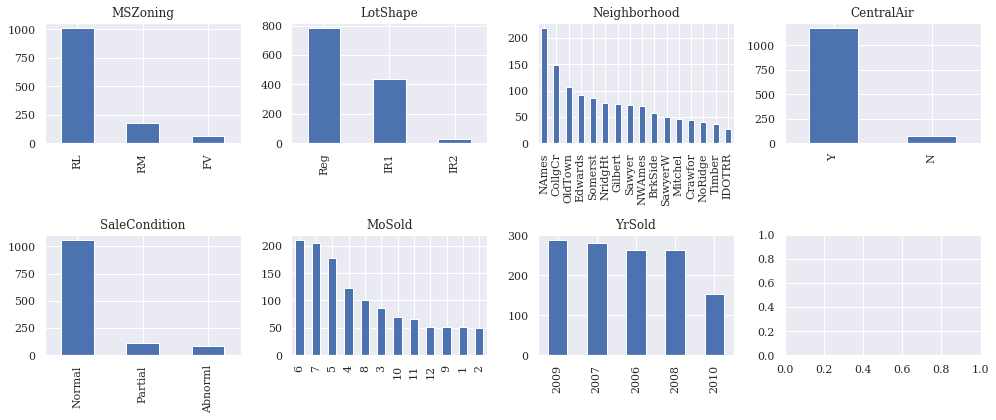

In [22]:
fig, ax = plt.subplots(2,4, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    housing[var].value_counts().plot(kind='bar', ax=subplot, title=var)

fig.tight_layout()

# Scatter plot

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


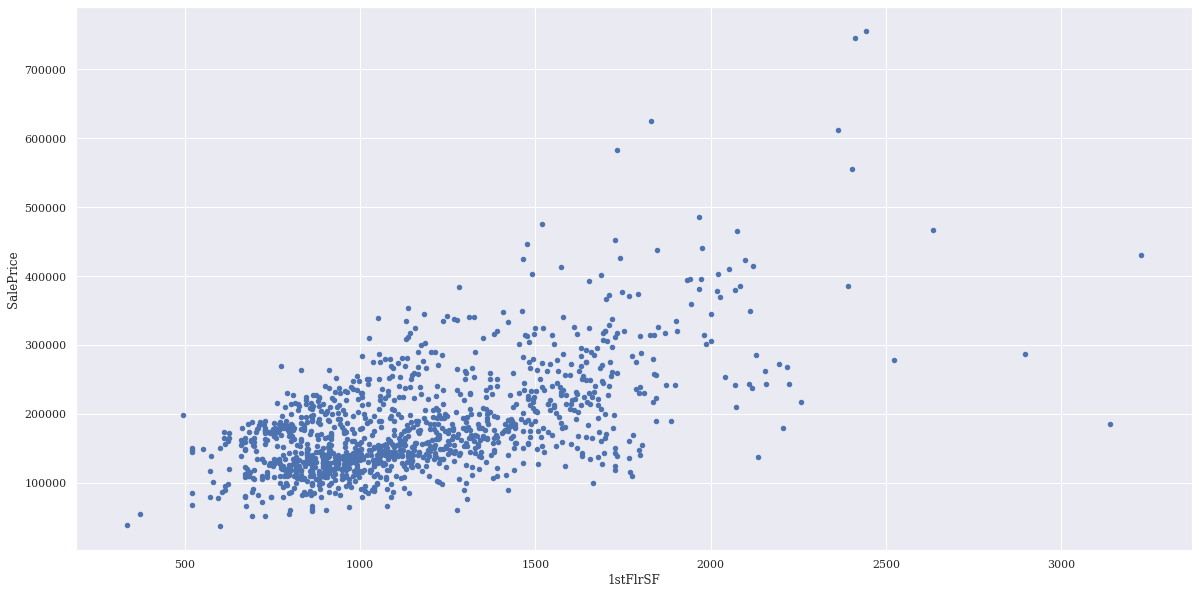

In [23]:
housing.plot.scatter(x='1stFlrSF', y='SalePrice');

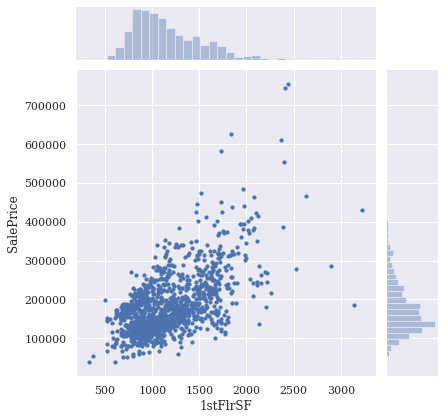

In [24]:
sns.jointplot(x='1stFlrSF', y='SalePrice', data=housing, joint_kws={"s": 10});

# Visualizing many scatter plots at the same time

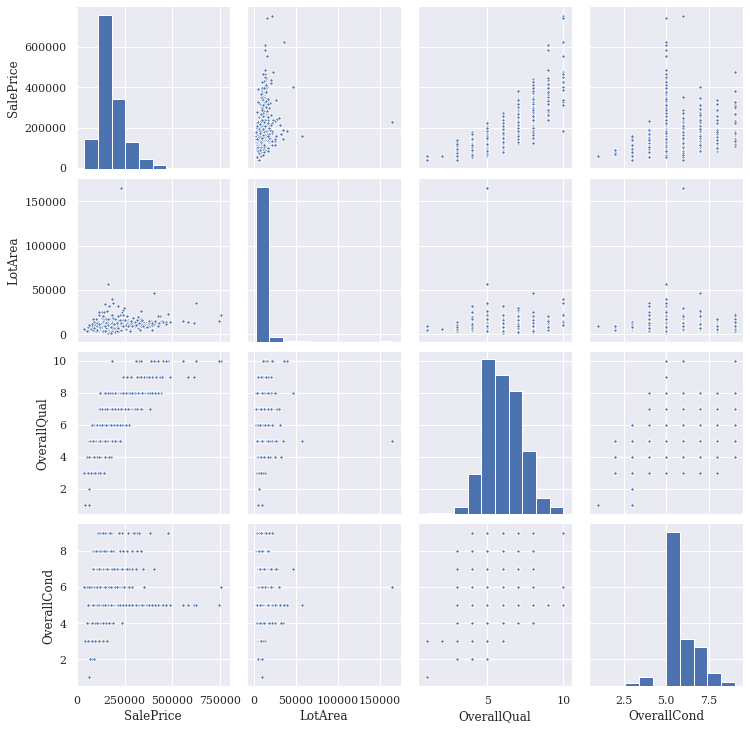

In [25]:
sns.pairplot(housing[numerical_vars[:4]], plot_kws={"s": 10});

Each of the plots is a pairwise relationship between the variables that we have in our DataFrame.
- It is recommended to don't have more than 4 variables at the same time.
- The plots show us that we have a very clear positive relationship between SalePrice of the house and another variable.
- The relationship is still positive, but not clear with the OverallCond of the house.

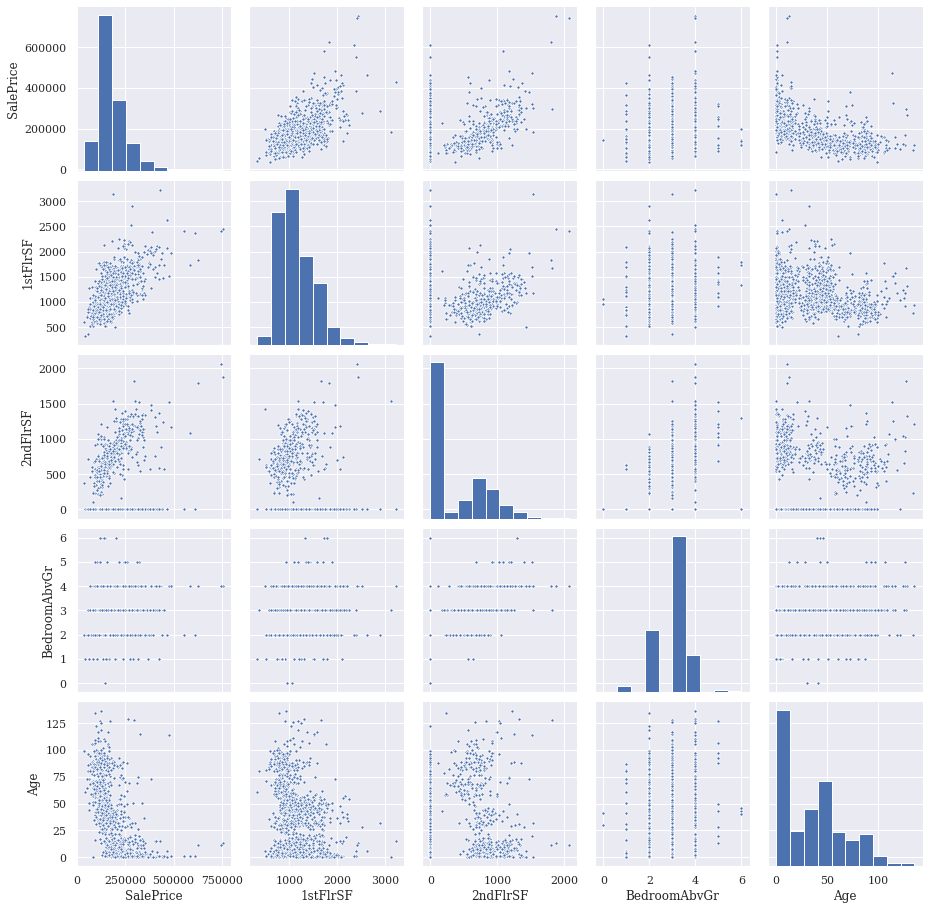

In [26]:
sns.pairplot(housing[['SalePrice']+numerical_vars[4:]], plot_kws={"s": 10});

- Here we see a clear positive relationship between SalePrice and 1stFlrSF and 2ndFlrSF.
- We also have a negative relationship that is not linear between the Age and SalePrice variables. We can see here that as the age goes up, the SalePrice of the house goes down, but this relationship is a curve, not a straight line.

# Box plot

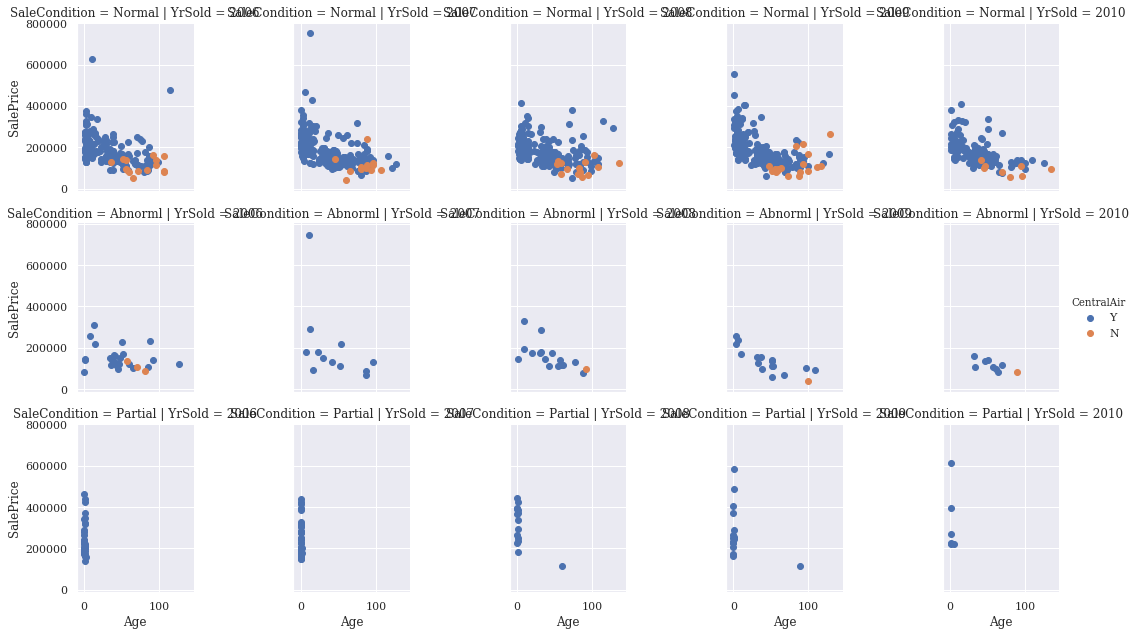

In [27]:
# Relationships between SalePrice and the rest of categorical variables
conditional_plot = sns.FacetGrid(housing, col="YrSold", row="SaleCondition", hue='CentralAir')
conditional_plot.map(plt.scatter, "Age", "SalePrice").add_legend();

Here, we see the box plot of the variable CentralAir that we placed on the x axis and the SalePrice of the house on the y axis. 
- We see that, for houses with no CentralAir, the SalePrice is definitely lower and the distribution of prices is definitely lower than for houses that have CentralAir.

# Visualize many box plots in a single visualization

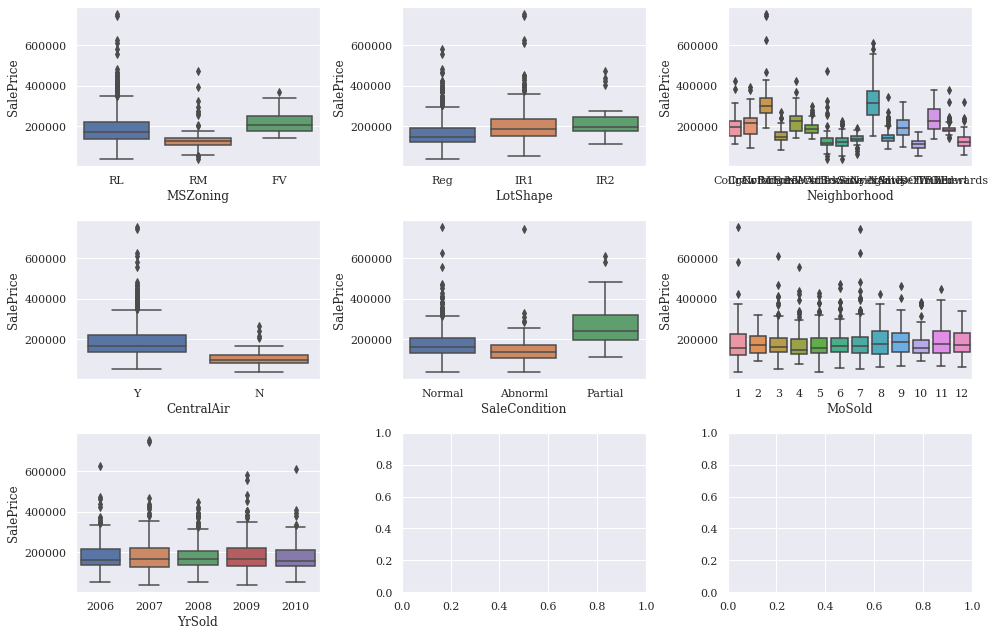

In [28]:
fig, ax = plt.subplots(3,3, figsize=(14,9))
for var, subplot in zip(categorical_vars, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=housing, ax=subplot)
    
fig.tight_layout()

Here, we see a difference in distribution in the category for the variable MSZoning;
- the category RM definitely has a distribution with lower sale prices
- In the Neighborhood variable, we see that there is definitely a different distribution for different neighborhoods.

# Relationship between the Neighborhood and the SalePrice variables:

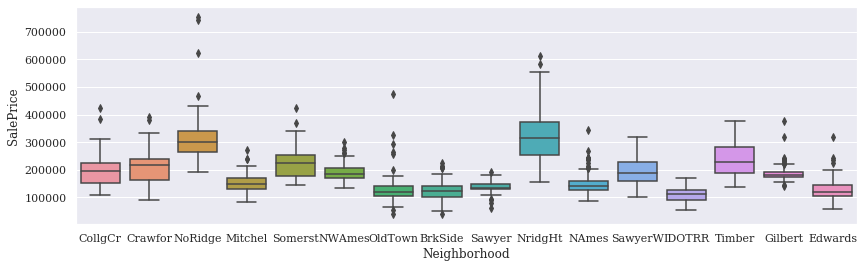

In [29]:
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x='Neighborhood', y='SalePrice', data=housing, ax=ax);

- We see that different neighborhoods have varying distributions of price

we see the visualization of the distribution of the prices in the different neighborhoods. Hence, we see the cheapest neighborhoods, where the median price of the house is around 100,000, and the most expensive neighborhoods, where the median price of the house is around 300,000. We see that for some neighborhoods, dispersion between the prices is very low, so when you see small boxes, this means that all the prices are close to each other, and when you see large boxes, it means that you have a lot of dispersion in the distribution of prices. So there is a lot of information we can obtain from these visualizations.

# Complex conditional plots

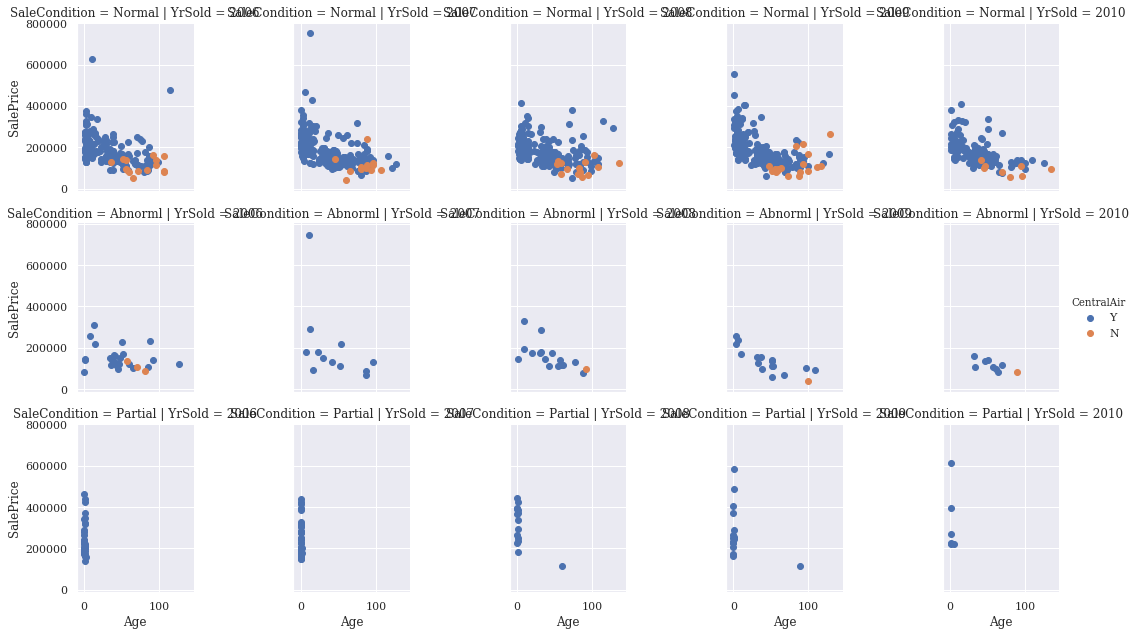

In [30]:
conditional_plot = sns.FacetGrid(housing, col="YrSold",  row="SaleCondition", hue='CentralAir')
conditional_plot.map(plt.scatter, "Age", "SalePrice").add_legend();